<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Machine_learning_Assignments/blob/main/Assignment1_Kmeans/Dhanasree_Machine_Learning_Cluster_SalesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Objective

Sales prediction Using big mart Data:

The dataset corresponds to Big mart, a retail outlet. The dataset consists of various details about the items sold and the outlets where the items are sold. The dataset also contains the total sales value of the outlet for a given item. This data can be used to predict the sales of these outlets for the items in future. This prediction can help management make careful decisions on various factors such as labor resources to use, open outlets in areas where sales is high, sell more of the item (or item types) in demand. It also helps make decisions on outlets or items which are not performing well. This prediction can also determine if the oulet performs as per expectations and make changes to strategy accordingly for better sales and profits. 

The clusters we have formed below, and the plots drawn based on the clusters help make the following decisions and devise the following strategies.

  - The clusters are grouped based on how much sales they make. This helps us understand and devise marketing strategies accordingly. 

  - The cluster 0 has stores, location and item types that contribute to least sales value. Hence we can devise a strategy accordingly to increase the sales in these locations and item_types.

  - The stores, locations and item_types in cluster 1 make the most sales, hence we can bring more store of those types, locations and item_types.

  - Items with low visibility make more sales, than items with high visibility. Decisions can be made based on this insight.  

Apart from clutsers, predictions can be made for future years and outlets on how the sales will be and business can be prepared accordingly.

The colab notebook contains:

- Install and import statements

- Load data

- Exploratory data analysis

- Data Cleaning and preprocessing 

- Data imputation

- Encoding of categorical values

- Feature Engineering - featureWiz

- Elbow method for determining number of clusters

- Clustering methods used: 

    K-Modes(since datset contains categorical features) 
    
    K - means
    
    Agglomerative clustering

    K - means using Pytorch


Install featurewiz

In [1]:
!pip install featurewiz
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 6.3 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import statements

In [2]:
from featurewiz import featurewiz
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from kmodes.kprototypes import KPrototypes
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



Read the sales data into pandas dataframe

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Machine_learning_Assignments/main/dataset/bigmart_Sales.csv')

View first 5 records of the dataframe

In [4]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
categorical_features_idx = [0, 2, 4, 6, 7, 8, 9, 10]

In [6]:
numeric_features_idx = [1, 3, 5, 11]

In [7]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [8]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

Get the number of records and fields in the dataset

In [9]:
print("The data has a size of: ")
df.shape

The data has a size of: 


(8523, 12)

View the columns in the dataset

In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Datatypes of the columns in the dataset

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

View category values that various columns hold, and the number of occurances

In [12]:
print("Total categories in the feature Item_Type:\n", df["Item_Type"].value_counts(), "\n")
print("Total categories in the feature Outlet_Type:\n", df["Outlet_Type"].value_counts(), "\n")
print("Total categories in the feature Outlet_Size:\n", df["Outlet_Size"].value_counts(), "\n")
print("Total categories in the feature Outlet_Location_Type:\n", df["Outlet_Location_Type"].value_counts(), "\n")
print("Total categories in the feature Item_Fat_Content:\n", df["Item_Fat_Content"].value_counts())

Total categories in the feature Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Total categories in the feature Outlet_Type:
 Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 

Total categories in the feature Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Total categories in the feature Outlet_Location_Type:
 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: 

Plot some features to visualize

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

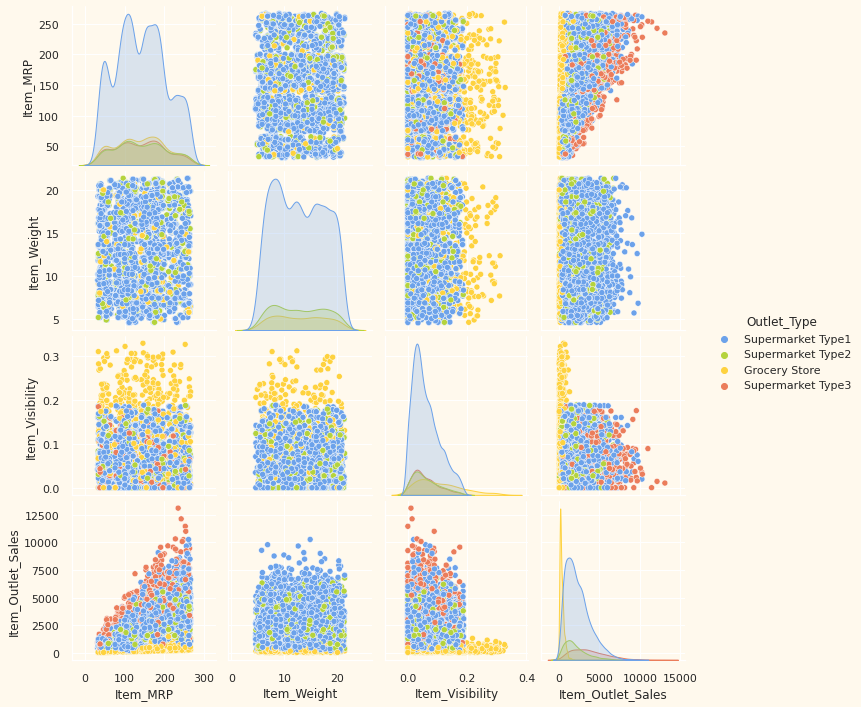

In [13]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#bcaecc", "#442288", "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"]
cmap = colors.ListedColormap(["#bcaecc", "#442288", "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"])

#Plotting the below features
To_Plot = [ 'Item_MRP', 'Outlet_Type', 'Item_Weight', 'Outlet_Identifier', 'Item_Visibility', 'Item_Outlet_Sales']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Outlet_Type",palette= ([ "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"]))

plt.show()

Correlation matrix

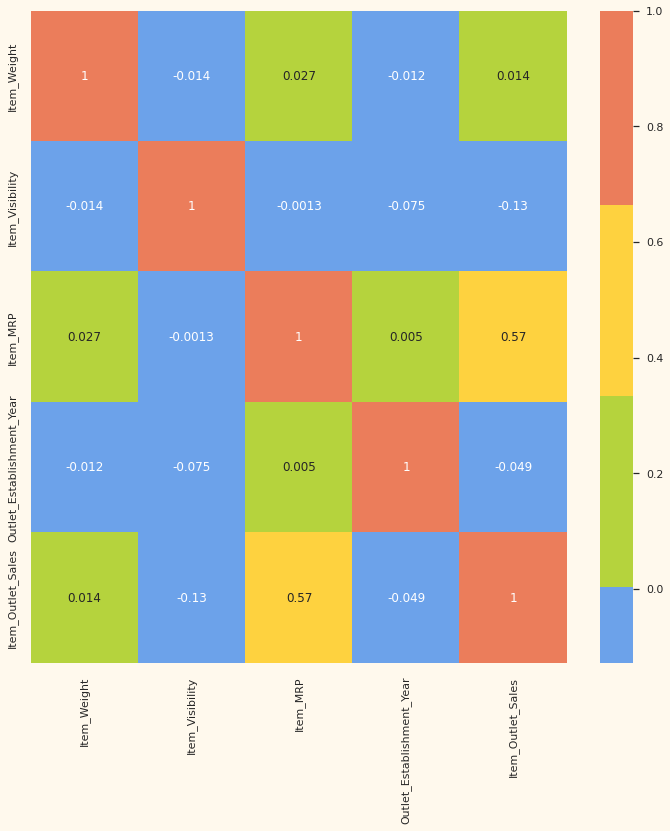

In [14]:
corrmat= df.corr()
plt.figure(figsize=(12,12))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

For the integer values in the dataset, viewing various values such as mean, standard deviation etc. for every column

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Finding missing/Null values

In [16]:
print("Missing values in data: \n")
df.isnull().sum()

Missing values in data: 



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Figure size 720x432 with 0 Axes>

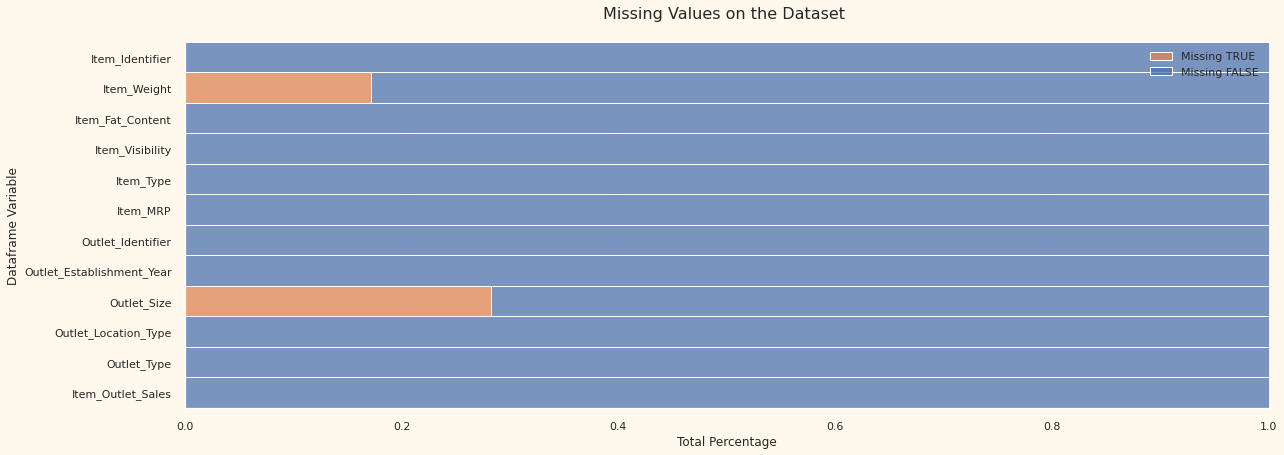

In [17]:
# Show a dataframe of missing values
plt.figure(figsize=(10,6))

sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    # Change aspect of the chart
    aspect=3,
    height=6,
    legend=False)

plt.title("Missing Values on the Dataset \n", size=16)
plt.xlabel("Total Percentage")
plt.ylabel("Dataframe Variable")
plt.legend(["Missing TRUE", "Missing FALSE"]);

Data Imputation

Replace NaNs in the Item_weight column with the mean of values in the same column

In [18]:
mean_value=df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=mean_value, inplace=True)

In [19]:
df.groupby(['Outlet_Type','Outlet_Size']).size().reset_index().rename(columns={0:'count'})

,Outlet_Type,Outlet_Size,count
0,Grocery Store,Small,528
1,Supermarket Type1,High,932
2,Supermarket Type1,Medium,930
3,Supermarket Type1,Small,1860
4,Supermarket Type2,Medium,928
5,Supermarket Type3,Medium,935


In [20]:
df['Outlet_Size'] = np.where((df['Outlet_Size'].isnull().values.any() and df['Outlet_Type'] == 'Supermarket Type1'), 'Small', df['Outlet_Size'])

In [21]:
df['Outlet_Size'] = np.where((df['Outlet_Size'].isnull().values.any() and df['Outlet_Type'] == 'Grocery Store'), 'Small', df['Outlet_Size'])

In [22]:
df['Outlet_Size'] = np.where((df['Outlet_Size'].isnull().values.any() and df['Outlet_Type'] == 'Supermarket Type2'), 'Medium', df['Outlet_Size'])

In [23]:
df['Outlet_Size'] = np.where((df['Outlet_Size'].isnull().values.any() and df['Outlet_Type'] == 'Supermarket Type3'), 'Medium', df['Outlet_Size'])

In [24]:
print("Missing values in data: \n")
df.isnull().sum()

Missing values in data: 



Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

In [26]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')

In [27]:
#df = (df['Outlet_Establishment_Year'] == 2009)
#df.loc[df['Outlet_Establishment_Year'] == 2009]

In [28]:
mark_array=df.values

Using K-Modes for clustering as data has categorical features in it

In [29]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2455, ncost: 3741992855.0292454
Run: 1, iteration: 2/20, moves: 1180, ncost: 3005600480.516472
Run: 1, iteration: 3/20, moves: 679, ncost: 2769796312.2491846
Run: 1, iteration: 4/20, moves: 526, ncost: 2662827376.236181
Run: 1, iteration: 5/20, moves: 338, ncost: 2615341985.6987762
Run: 1, iteration: 6/20, moves: 322, ncost: 2576802096.1340046
Run: 1, iteration: 7/20, moves: 228, ncost: 2555917126.2798815
Run: 1, iteration: 8/20, moves: 196, ncost: 2541987242.2397203
Run: 1, iteration: 9/20, moves: 165, ncost: 2533153189.874618
Run: 1, iteration: 10/20, moves: 115, ncost: 2527575369.8072023
Run: 1, iteration: 11/20, moves: 102, ncost: 2523681919.271138
Run: 1, iteration: 12/20, moves: 87, ncost: 2521478000.648484
Run: 1, iteration: 13/20, moves: 67, ncost: 2519196232.4141426
Run: 1, iteration: 14/20, 

In [30]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['12.771496839861951' '0.07493338096312316' '106.10677672140623'
  '700.7321532123274' 'FDW13' 'Low Fat' 'Fruits and Vegetables' 'OUT010'
  '1985' 'Small' 'Tier 3' 'Supermarket Type1']
 ['12.96421775040814' '0.05810200273841062' '215.1832476821191'
  '6283.538206622533' 'FDA15' 'Low Fat' 'Fruits and Vegetables' 'OUT027'
  '1985' 'Small' 'Tier 3' 'Supermarket Type1']
 ['12.861656550709316' '0.060276795981897356' '143.04324561911642'
  '2141.297170021723' 'FDD38' 'Low Fat' 'Snack Foods' 'OUT017' '2007'
  'Small' 'Tier 2' 'Supermarket Type1']
 ['12.990249975636745' '0.060481254925266806' '182.875879478054'
  '3825.2456976275184' 'DRN47' 'Low Fat' 'Fruits and Vegetables' 'OUT027'
  '1985' 'Small' 'Tier 3' 'Supermarket Type1']]


In [31]:
# Prediction
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [32]:
df['cluster'] = list(clusters)

Visualizing clusters by plotting Sales Value across Item types

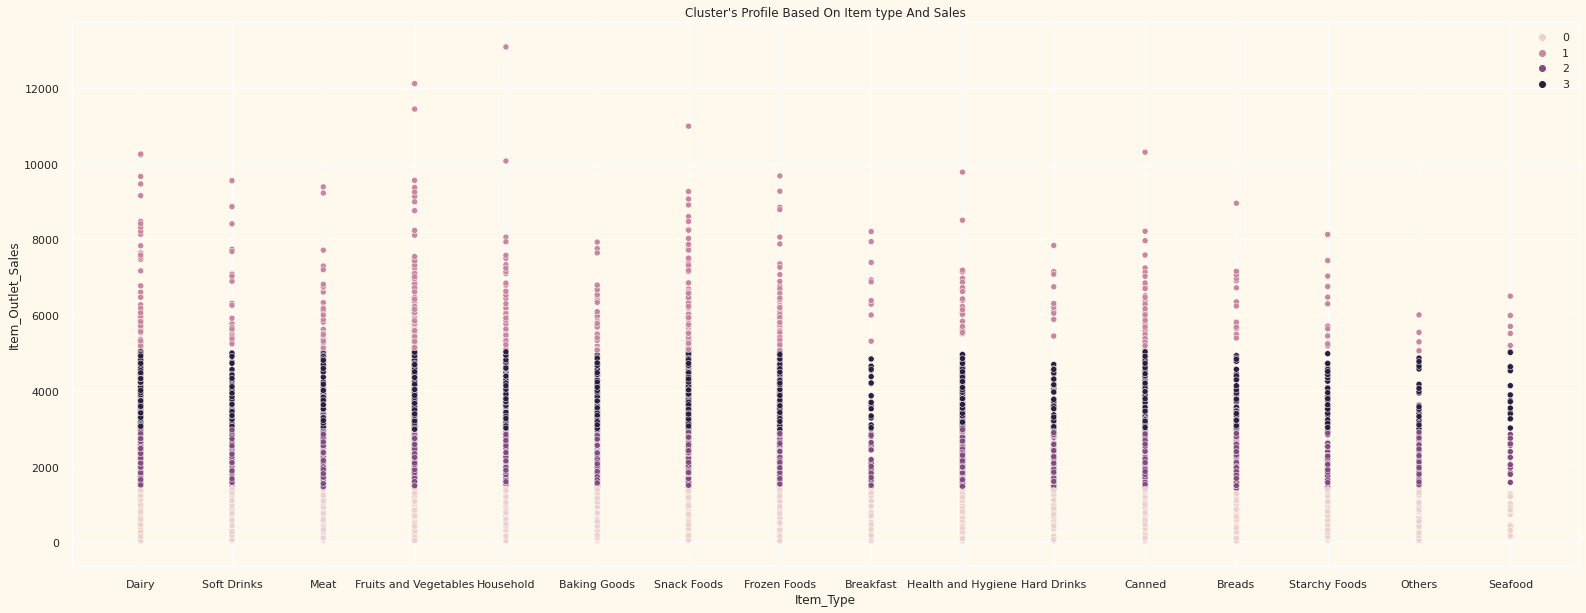

In [33]:
plt.subplots(figsize = (27,10))
pl = sns.scatterplot(data = df,x=df["Item_Type"], y=df["Item_Outlet_Sales"],hue=df["cluster"])
pl.set_title("Cluster's Profile Based On Item type And Sales")
plt.legend()
plt.show()

Viewing all the different clusters

In [34]:
df[df['cluster']== 0].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,0
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Small,Tier 3,Supermarket Type1,343.5528,0
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,0
17,FDP49,9.000000,Regular,0.069196,Breakfast,54.3614,OUT049,1999,Small,Tier 1,Supermarket Type1,718.3982,0
23,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,0
25,NCD06,13.000000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080,0
26,FDV10,7.645000,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800,0


In [35]:
df[df['cluster']==1].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
43,FDC02,21.350000,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228,1
47,FDV49,10.000000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,Small,Tier 2,Supermarket Type1,5815.0972,1
55,FDK21,7.905000,Low Fat,0.010053,Snack Foods,249.0408,OUT018,2009,Medium,Tier 3,Supermarket Type2,6258.5200,1
74,NCZ18,7.825000,Low Fat,0.186357,Household,254.3698,OUT049,1999,Small,Tier 1,Supermarket Type1,5580.7356,1
79,FDV25,5.905000,Low Fat,0.000000,Canned,222.5456,OUT045,2002,Small,Tier 2,Supermarket Type1,5305.0944,1
115,FDD17,7.500000,Low Fat,0.032678,Frozen Foods,239.0906,OUT049,1999,Small,Tier 1,Supermarket Type1,5942.2650,1
130,FDY25,12.857645,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944,1
132,NCR53,12.857645,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524,1
136,FDH35,12.857645,Low Fat,0.059957,Starchy Foods,165.4526,OUT027,1985,Medium,Tier 3,Supermarket Type3,5262.4832,1
145,FDP16,18.600000,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Small,Tier 1,Supermarket Type1,7370.4060,1


In [36]:
df[df['cluster']==2].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,2
10,FDY07,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Small,Tier 1,Supermarket Type1,1516.0266,2
11,FDA03,18.500000,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530,2
12,FDX32,15.100000,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Small,Tier 1,Supermarket Type1,1589.2646,2
13,FDS46,17.600000,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076,2
14,FDF32,16.350000,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,Small,Tier 3,Supermarket Type1,1977.4260,2
15,FDP49,9.000000,Regular,0.069089,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192,2
16,NCB42,11.800000,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,2
18,DRI11,12.857645,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,2
19,FDU02,13.350000,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224,2


In [37]:
df[df['cluster']==3].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,3
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,3
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,3
20,FDN22,18.850000,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,Small,Tier 3,Supermarket Type1,3775.0860,3
21,FDW12,12.857645,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,3
24,FDR28,13.850000,Regular,0.025896,Frozen Foods,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250,3
32,FDP33,18.700000,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,3
35,NCX29,10.000000,Low Fat,0.089291,Health and Hygiene,146.7102,OUT049,1999,Small,Tier 1,Supermarket Type1,3791.0652,3
40,FDU02,13.350000,Low Fat,0.102512,Dairy,230.6352,OUT046,1997,Small,Tier 1,Supermarket Type1,3435.5280,3
50,NCL17,7.390000,Low Fat,0.067780,Health and Hygiene,143.8812,OUT046,1997,Small,Tier 1,Supermarket Type1,3134.5864,3


Visualizing clusters by plotting Sales value across outlet types.
Here we can see that grocery store has the least sales and Supermarket type 3 has the most sales

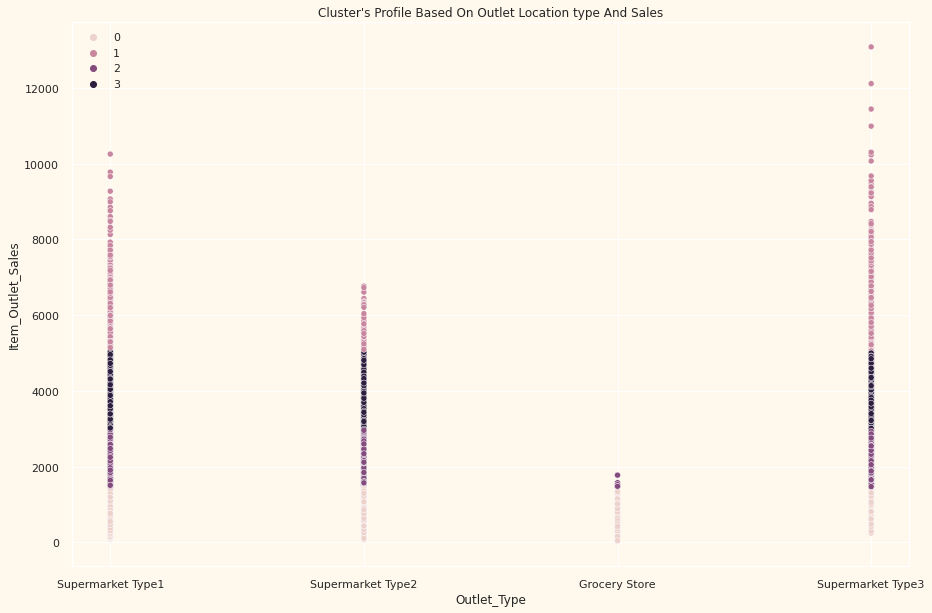

In [39]:
plt.subplots(figsize = (15,10))
pl = sns.scatterplot(data = df,x=df["Outlet_Type"], y=df["Item_Outlet_Sales"],hue=df["cluster"])
pl.set_title("Cluster's Profile Based On Outlet Location type And Sales")
plt.legend()
plt.show()

Which makes more sales? Is it better to bring up more new store of small size or medium size?

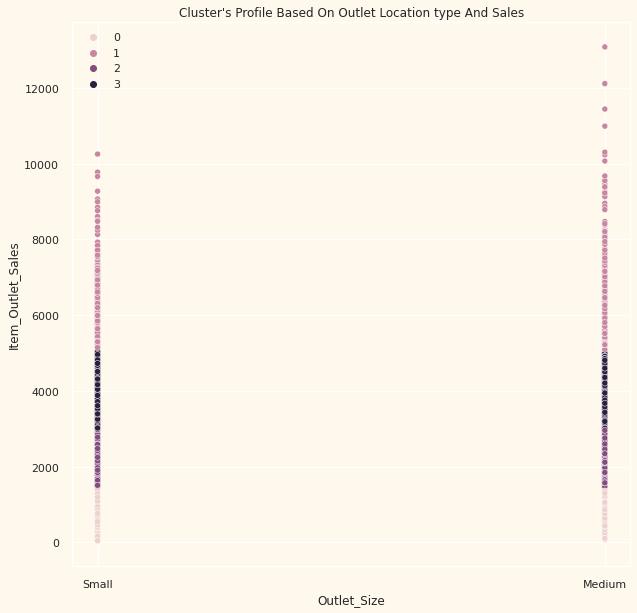

In [40]:
plt.subplots(figsize = (10,10))
pl = sns.scatterplot(data = df,x=df["Outlet_Size"], y=df["Item_Outlet_Sales"],hue=df["cluster"])
pl.set_title("Cluster's Profile Based On Outlet Location type And Sales")
plt.legend()
plt.show()

In which locations do the stores make most sales?

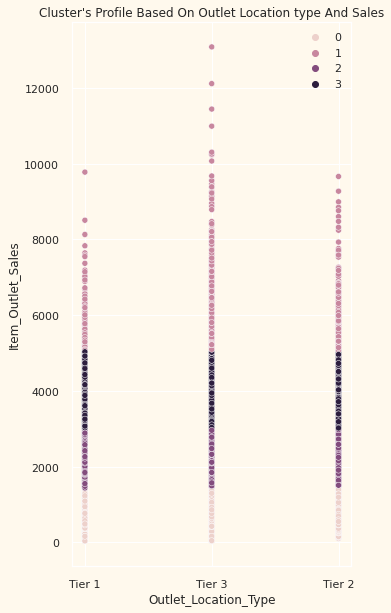

In [41]:
plt.subplots(figsize = (5,10))
pl = sns.scatterplot(data = df,x=df["Outlet_Location_Type"], y=df["Item_Outlet_Sales"],hue=df["cluster"])
pl.set_title("Cluster's Profile Based On Outlet Location type And Sales")
plt.legend()
plt.show()

From the above clusters and visulization, We can understand that clusters are grouped based on how much sales they make. This helps us understand and devise marketing strategies accordingly. 

The cluster 0 has stores, location and item types that contribute to least sales value. Hence we can devise a strategy according.

The stores, locations and item_types in cluster 1 make the most sales, hence we can bring more store of those types, locations and item_types.

Encoding all category to numeric values

In [42]:
df['Item_Identifier'] = df['Item_Identifier'].astype('category')
df['Item_Identifier'] = df['Item_Identifier'].cat.codes

df['Item_Fat_Content'] = df['Item_Fat_Content'].astype('category')
df['Item_Fat_Content'] = df['Item_Fat_Content'].cat.codes

df['Item_Type'] = df['Item_Type'].astype('category')
df['Item_Type'] = df['Item_Type'].cat.codes

df['Outlet_Identifier'] = df['Outlet_Identifier'].astype('category')
df['Outlet_Identifier'] = df['Outlet_Identifier'].cat.codes

df['Outlet_Size'] = df['Outlet_Size'].astype('category')
df['Outlet_Size'] = df['Outlet_Size'].cat.codes

df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype('category')
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].cat.codes

df['Outlet_Type'] = df['Outlet_Type'].astype('category')
df['Outlet_Type'] = df['Outlet_Type'].cat.codes

In [43]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,3
1,8,5.92,1,0.019278,14,48.2692,3,2009,0,2,2,443.4228,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,2
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052,0


Feature Engineering

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (8523, 13)
#### Single_Label Regression problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
##################################################################

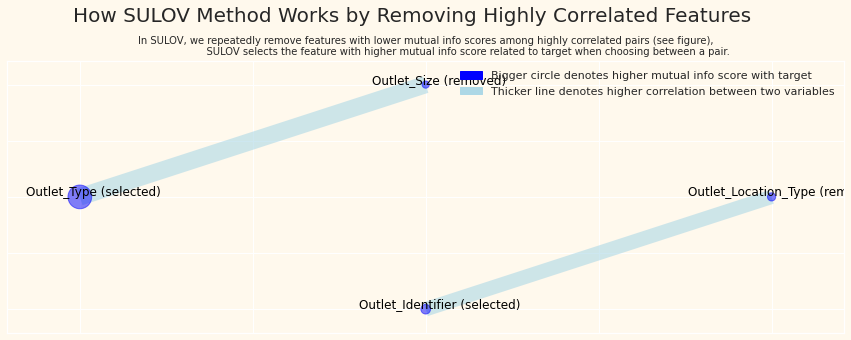

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 9
Final list of selected 9 vars after SULOV = ['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Type', 'Item_Visibility', 'Item_Weight', 'cluster', 'Outlet_Type', 'Outlet_Identifier']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 9 
    Taking top 2 features per iteration...
    XGBoost version using 1.7.3 as tree method: gpu_hist
Number of booster rounds = 100
        using 9 variables...
Regular XGBoost is crashing due to: [06:11:44] ../src/gbm/gbtree.cc:625: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) 

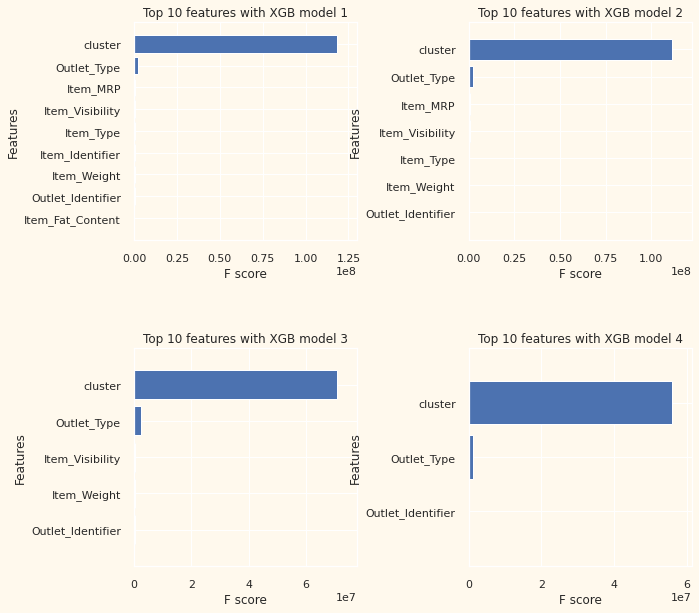

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 4 important features:
['cluster', 'Outlet_Type', 'Item_MRP', 'Item_Visibility']
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 4 important features and a train dataframe


In [44]:
target = 'Item_Outlet_Sales'
features = featurewiz(df, target, corr_limit=0.70,verbose=2)

In [45]:
#Creating a copy of data
df_copy = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Item_Fat_Content', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Size']
#'Outlet_Type', 'Item_MRP', 'Item_Visibility', 'Item_Type', 'Item_Weight'
df_copy = df_copy.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_ds = pd.DataFrame(scaler.transform(df_copy),columns= df_copy.columns )
print("All features are now scaled")

All features are now scaled


In [46]:
cols_del = ['Item_Fat_Content', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type', 'cluster', 'Outlet_Establishment_Year']
df_num = df.copy()
df_num.drop(cols_del, axis=1, inplace = True)

In [47]:
cols_del = ['Outlet_Type', 'Item_Type']
df_num_scaled = scaled_ds.copy()
df_num_scaled.drop(cols_del, axis=1, inplace = True)

In [48]:
df_num.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


Elbow Method to determine the number of clusters to be formed:


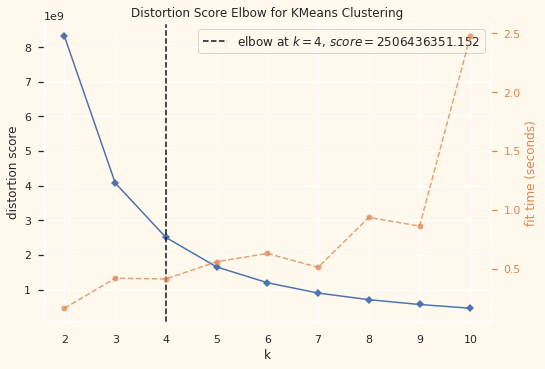

In [49]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_num)
Elbow_M.show()

K means clustering

In [50]:
kmeans = KMeans(n_clusters=4, max_iter=15).fit(df_num)
centers = kmeans.cluster_centers_
y_pred = kmeans.predict(df_num)

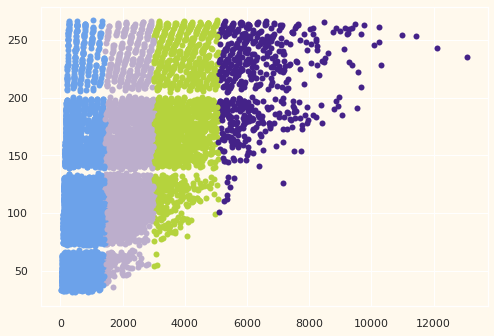

In [51]:
colors = ["#bcaecc", "#442288", "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"]
center_colors = colors[:len(y_pred)]

for i, l in enumerate(kmeans.labels_):
    plt.plot(df_num['Item_Outlet_Sales'].values[i], df_num['Item_MRP'].values[i], color=colors[l], marker='o',ls='None')

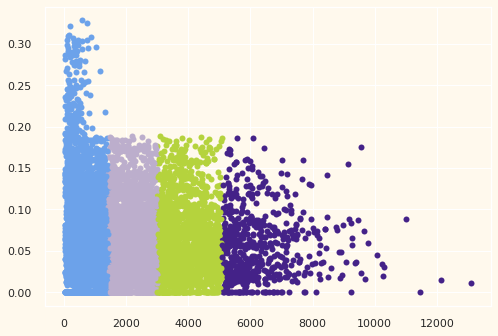

In [52]:
colors = ["#bcaecc", "#442288", "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"]
center_colors = colors[:len(y_pred)]

for i, l in enumerate(kmeans.labels_):
    plt.plot(df_num['Item_Outlet_Sales'].values[i], df_num['Item_Visibility'].values[i], color=colors[l], marker='o',ls='None')

Agglomerative Clustering

In [53]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_num)
df_num["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

In [54]:
x = scaled_ds["Item_MRP"]
#y = scaled_ds["Outlet_Type"]
z = scaled_ds["Item_Weight"]
a = scaled_ds["Item_Visibility"]
#b = scaled_ds["Item_Type"]
t = scaled_ds['Item_Outlet_Sales']

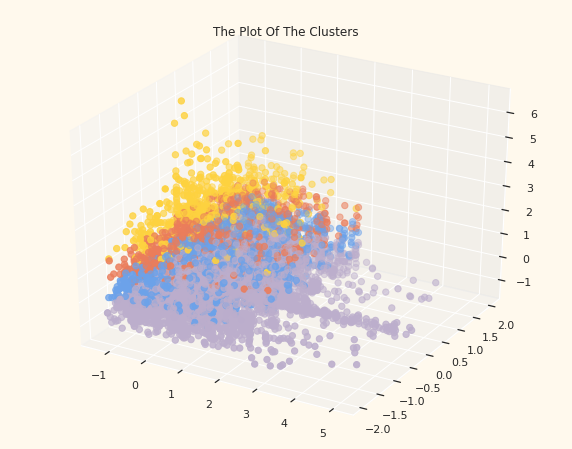

In [55]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(a, z, t, s=40, c=df_num["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

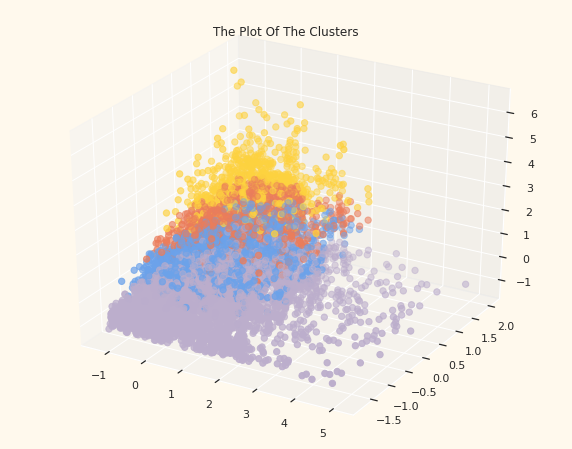

In [56]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(a, x, t, s=40, c=df_num["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

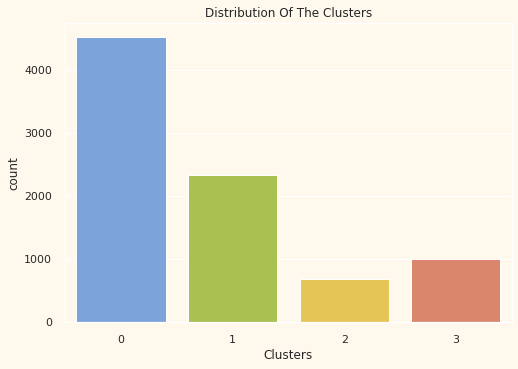

In [57]:
#Plotting countplot of clusters
pal = ["#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B", "#bcaecc"]
pl = sns.countplot(x=df_num["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()


Here we can see how item visibility has an effect on the sales value

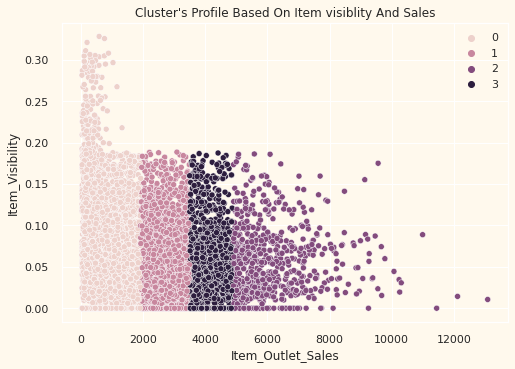

In [58]:
pl = sns.scatterplot(data = df_num,x=df_num["Item_Outlet_Sales"], y=df_num["Item_Visibility"],hue=df_num["Clusters"])
pl.set_title("Cluster's Profile Based On Item visiblity And Sales")
plt.legend()
plt.show()

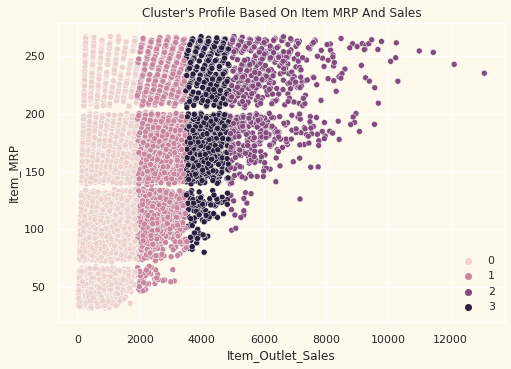

In [59]:
pl = sns.scatterplot(data = df_num,x=df_num["Item_Outlet_Sales"], y=df_num["Item_MRP"],hue=df_num["Clusters"])
pl.set_title("Cluster's Profile Based On Item MRP And Sales")
plt.legend()
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
agglo_clustering = AgglomerativeClustering(n_clusters=4)
agglo_clustering.fit(scaled_ds)

AgglomerativeClustering(n_clusters=4)

In [62]:
clusters = agglo_clustering.fit_predict(scaled_ds)

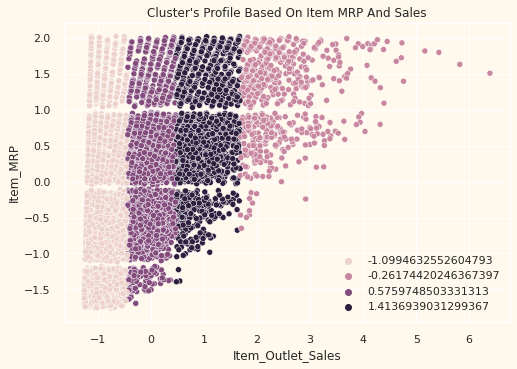

In [63]:
pl = sns.scatterplot(data = scaled_ds,x=scaled_ds["Item_Outlet_Sales"], y=scaled_ds["Item_MRP"],hue=scaled_ds["cluster"])
pl.set_title("Cluster's Profile Based On Item MRP And Sales")
plt.legend()
plt.show()

K-means with Pytorch

(Tried to do this, even with subset of data, but chrome started to crash, so commenting it out)

In [64]:
#!pip install kmeans-pytorch

In [65]:
#import torch
#import numpy as np 
#import pandas as pd
#import matplotlib.pyplot as plt
#%matplotlib inline 

In [66]:
#from kmeans_pytorch import kmeans, kmeans_predict
#import torch.utils.data as data_utils

In [67]:
#df = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Machine_learning_Assignments/main/dataset/bigmart_Sales.csv')
#df = df.head(100) 
#target_df = df[['Item_Type']]
#df = df[['Outlet_Establishment_Year', 'Item_MRP', 'Item_Visibility', 'Item_Weight', "Item_Outlet_Sales"]]

In [68]:
#df_tensor = torch.tensor(df.to_numpy())

#df_tensor

In [69]:
#dataset = "https://raw.githubusercontent.com/Dhanasree-Rajamani/Machine_learning_Assignments/main/dataset/bigmart_Sales.csv"

In [70]:
#class sales_dataset(data_utils.Dataset):
#    def __init__(self, X_data, y_data):
#        self.X_data = X_data
#        self.y_data = y_data
        
#    def __getitem__(self, index):
#        return self.X_data[index], self.y_data[index]
        
#    def __len__ (self):
#        return len(self.X_data)
    
#    def __float__(self):
#        return 0.0

In [71]:
#dataset = sales_dataset(df_tensor, target_df)
#dataset[0:5]

In [72]:
#if torch.cuda.is_available():
#    device = torch.device('cuda:0')
#else:
#    device = torch.device('cpu')

In [73]:
#num_clusters = 3
#cluster_ids_x, cluster_centers = kmeans(
#    X=df_tensor, num_clusters=num_clusters, distance='euclidean', device=device
#)

#print(cluster_ids_x)
#print(cluster_centers)